In [1]:
# Paso 1: Chequear el ambiente Anaconda y los paquetes/librerías instalados
# import sys
# !conda env list
# !conda list
# !conda update --all

# Descargar e instalar pandas, numpy, scikit-learn. Podría ser necesario hacerlos desde el prompt de Anaconda
# !conda install pandas # pandas includes numpy 
# !conda install scikit-learn

# Paso 2: Cargar los paquetes y librerías necesarios 

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Paso 3: Cargar los datos desde el archivo CSV en el dataframe llamado df.

df = pd.read_csv(r"C:\Users\migue\Downloads\base_proyecto.csv", sep=",", header = 0)  
df.head() # show the "head" -- first 5 rows of the data; note, these are rows 0...4

,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bounces,checkout_page_top,client_id,contactus_top,converted_in_7days,country,customer_service_amc_login_top,customer_service_request_login_top,...,visited_customer_service_amc_login,visited_customer_service_request_login,visited_demo_page,visited_offer_page,visited_security_solutions_page,visited_storelocator,visited_successbookdemo,visited_vacuum_cleaner_page,visited_water_purifier_page,water_purifier_page_top
0,0,0,0,0,1000148488.154624,0,0,i,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1000446930.154546,0,0,d,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1000984214.15461,0,0,i,0,0,...,0,0,0,0,0,0,0,0,1,142
3,0,0,1,0,1001576926.154625,0,0,d,0,0,...,0,0,0,1,0,0,0,0,1,107
4,0,0,1,0,1002130272.15414,0,0,d,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bounces,checkout_page_top,contactus_top,converted_in_7days,customer_service_amc_login_top,customer_service_request_login_top,demo_page_top,dsls,...,visited_customer_service_amc_login,visited_customer_service_request_login,visited_demo_page,visited_offer_page,visited_security_solutions_page,visited_storelocator,visited_successbookdemo,visited_vacuum_cleaner_page,visited_water_purifier_page,water_purifier_page_top
count,709244.000000,709244.000000,709244.000000,709244.000000,709244.000000,709244.000000,709244.000000,709244.000000,709244.000000,709244.000000,...,709244.000000,709244.000000,709244.000000,709244.000000,709244.000000,709244.000000,709244.000000,709244.000000,709244.000000,709244.000000
mean,0.033344,2.410383,0.565557,5.530430,7.160657,0.003873,9.370662,2.289897,118.550290,3.450756,...,0.065233,0.018716,0.629613,0.045712,0.006418,0.007469,0.023056,0.075688,0.213917,67.983692
std,0.257350,46.549982,1.230695,77.135228,76.843266,0.062114,81.267483,36.332747,327.998863,13.566755,...,0.246936,0.135519,0.482909,0.208860,0.079856,0.086097,0.150080,0.264498,0.410069,291.398874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57.000000,5287.000000,157.000000,7021.000000,8138.000000,1.000000,8444.000000,3905.000000,28652.000000,182.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24982.000000


In [4]:
pd.set_option('display.max_rows', 500)
df.isnull().sum() # Chequeamos si hay datos faltantes

DemoReqPg_CallClicks_evt_count            0
air_purifier_page_top                     0
bounces                                   0
checkout_page_top                         0
client_id                                 0
contactus_top                             0
converted_in_7days                        0
country                                   0
customer_service_amc_login_top            0
customer_service_request_login_top        0
date                                      0
demo_page_top                             0
device                                    0
dsls                                      0
fired_DemoReqPg_CallClicks_evt            0
fired_help_me_buy_evt                     0
fired_phone_clicks_evt                    0
goal4Completions                          0
help_me_buy_evt_count                     0
newUser                                   0
offer_page_top                            0
pageviews                                 0
paid                            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709244 entries, 0 to 709243
Data columns (total 45 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   DemoReqPg_CallClicks_evt_count          709244 non-null  int64 
 1   air_purifier_page_top                   709244 non-null  int64 
 2   bounces                                 709244 non-null  int64 
 3   checkout_page_top                       709244 non-null  int64 
 4   client_id                               709244 non-null  object
 5   contactus_top                           709244 non-null  int64 
 6   converted_in_7days                      709244 non-null  int64 
 7   country                                 709244 non-null  object
 8   customer_service_amc_login_top          709244 non-null  int64 
 9   customer_service_request_login_top      709244 non-null  int64 
 10  date                                    709244 non-null 

In [6]:
# Limpieza de los datos -- parte 1: conversión de tipos de datos que deberían ser categóricos

df['country'] = df['country'].astype('category')
df['date'] = df['date'].astype('category')
df['device'] = df['device'].astype('category')
df['region'] = df['region'].astype('category')
df['sourceMedium'] = df['sourceMedium'].astype('category')
df = df.drop(columns = 'client_id')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709244 entries, 0 to 709243
Data columns (total 44 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   DemoReqPg_CallClicks_evt_count          709244 non-null  int64   
 1   air_purifier_page_top                   709244 non-null  int64   
 2   bounces                                 709244 non-null  int64   
 3   checkout_page_top                       709244 non-null  int64   
 4   contactus_top                           709244 non-null  int64   
 5   converted_in_7days                      709244 non-null  int64   
 6   country                                 709244 non-null  category
 7   customer_service_amc_login_top          709244 non-null  int64   
 8   customer_service_request_login_top      709244 non-null  int64   
 9   date                                    709244 non-null  category
 10  demo_page_top                   

In [8]:
# Limpieza de datos -- parte 2: combinar categorías poco frecuentes ("niveles")

df['sourceMedium'].value_counts() # Tomemos el ejemplo de la variable Group.State


google / cpc                                                    502045
google / organic                                                144485
(direct) / (none)                                                48692
facebook / social                                                 5456
bing / organic                                                    2433
gaintheory / amc_sms                                               742
Quora / (not set)                                                  681
in.search.yahoo.com / referral                                     474
yahoo / organic                                                    450
m.facebook.com / referral                                          432
draquaguard.co.in / referral                                       418
eurosmile.in / referral                                            269
shapoorjipallonji.com / referral                                   167
securegw.paytm.in / referral                                       146
iksula

In [9]:
df['country'].value_counts() 

d    687780
i     21464
Name: country, dtype: int64

In [10]:
df['region'].value_counts() 

Maharashtra                          87481
Uttar Pradesh                        75985
Karnataka                            63308
Bihar                                53135
West Bengal                          52493
Delhi                                51091
Telangana                            45234
Gujarat                              44047
Madhya Pradesh                       36678
Rajasthan                            35624
Tamil Nadu                           34484
Assam                                18957
Odisha                               18386
Chandigarh                           17668
Kerala                               12654
Haryana                              11923
Michigan                              7245
Jammu and Kashmir                     6913
(not set)                             6425
Andhra Pradesh                        5089
Jharkhand                             3920
Manipur                               3236
Himachal Pradesh                      2976
Chhattisgar

In [11]:
df['device'].value_counts() 

mobile     608759
desktop     94487
tablet       5998
Name: device, dtype: int64

In [12]:


# Presentamos una función personalizada que llamaremos CombineRareCategories
# esta función tiene dos argumentos: el nombre del dataframe (data) y el número mínimo de puntos de datos para seguir 
# siendo una categoría separada (mincount)
# esta función recorrerá todas las columnas del marco de datos y combinará todas las categorías que aparezcan en los 
# datos menos que el número mínimo de veces en (Other)

def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

# Aplicamos esta función a variables con mincount=10                    
CombineRareCategories(df, 10)        

df[0:10] # Chequeamos los resultados

,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bounces,checkout_page_top,contactus_top,converted_in_7days,country,customer_service_amc_login_top,customer_service_request_login_top,date,...,visited_customer_service_amc_login,visited_customer_service_request_login,visited_demo_page,visited_offer_page,visited_security_solutions_page,visited_storelocator,visited_successbookdemo,visited_vacuum_cleaner_page,visited_water_purifier_page,water_purifier_page_top
0,0,0,0,0,0,0,i,0,0,2019-01-01,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,d,0,0,2019-01-01,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,i,0,0,2019-01-01,...,0,0,0,0,0,0,0,0,1,142
3,0,0,1,0,0,0,d,0,0,2019-01-01,...,0,0,0,1,0,0,0,0,1,107
4,0,0,1,0,0,0,d,0,0,2019-01-01,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,d,0,0,2019-01-01,...,0,0,1,0,0,0,0,0,0,0
6,0,20,0,0,0,0,d,0,51,2019-01-01,...,0,1,1,0,0,0,0,0,1,227
7,0,0,0,0,0,0,d,0,0,2019-01-01,...,0,0,1,0,0,0,0,0,0,0
8,0,0,2,0,0,0,d,0,0,2019-01-01,...,0,0,1,0,0,0,0,0,0,0
9,0,0,2,0,0,0,d,0,0,2019-01-01,...,0,0,1,0,0,0,0,0,0,0


In [13]:
len(pd.DataFrame(df))

709244

In [14]:
## DUMMIES

# fijación de variables categóricas
imputer = SimpleImputer(missing_values = np.nan, strategy='constant')
imputer.fit(df.select_dtypes(exclude=['int64','float64']))
df[df.select_dtypes(exclude=['int64','float64']).columns] = imputer.transform(df.select_dtypes(exclude=['int64','float64']))
           
# fijación de variables numéricas 
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
imputer.fit(df.select_dtypes(include=['int64','float64']))
df[df.select_dtypes(include=['int64','float64']).columns] = imputer.transform(df.select_dtypes(include=['int64','float64']))

In [15]:
# Limpieza de datos -- parte 4: creación de dummies para variables no numéricas ("one hot encoding")

df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

pd.options.display.max_columns = None # remove the limit on the number of columns by default only 20 are shows

df.head()  # nuestro dataset tiene ahora 241 columnas (!)

,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bounces,checkout_page_top,contactus_top,converted_in_7days,customer_service_amc_login_top,customer_service_request_login_top,demo_page_top,dsls,fired_DemoReqPg_CallClicks_evt,fired_help_me_buy_evt,fired_phone_clicks_evt,goal4Completions,help_me_buy_evt_count,newUser,offer_page_top,pageviews,paid,phone_clicks_evt_count,security_solutions_page_top,sessionDuration,sessions,storelocator_top,successbookdemo_top,vacuum_cleaner_page_top,visited_air_purifier_page,visited_checkout_page,visited_contactus,visited_customer_service_amc_login,visited_customer_service_request_login,visited_demo_page,visited_offer_page,visited_security_solutions_page,visited_storelocator,visited_successbookdemo,visited_vacuum_cleaner_page,visited_water_purifier_page,water_purifier_page_top,country_i,date_2019-01-02,date_2019-01-03,date_2019-01-04,date_2019-01-05,date_2019-01-06,date_2019-01-07,date_2019-01-08,date_2019-01-09,date_2019-01-10,date_2019-01-11,date_2019-01-12,date_2019-01-13,date_2019-01-14,date_2019-01-15,date_2019-01-16,date_2019-01-17,date_2019-01-18,date_2019-01-19,date_2019-01-20,date_2019-01-21,date_2019-01-22,date_2019-01-23,date_2019-01-24,date_2019-01-25,date_2019-01-26,date_2019-01-27,date_2019-01-28,date_2019-01-29,date_2019-01-30,date_2019-01-31,date_2019-02-01,date_2019-02-02,date_2019-02-03,date_2019-02-04,date_2019-02-05,date_2019-02-06,date_2019-02-07,date_2019-02-08,date_2019-02-09,date_2019-02-10,date_2019-02-11,date_2019-02-12,date_2019-02-13,date_2019-02-14,date_2019-02-15,date_2019-02-16,date_2019-02-17,date_2019-02-18,date_2019-02-19,date_2019-02-20,date_2019-02-21,date_2019-02-22,date_2019-02-23,date_2019-02-24,date_2019-02-25,date_2019-02-26,date_2019-02-27,date_2019-02-28,date_2019-03-01,device_mobile,device_tablet,region_Abu Dhabi,region_Ajman,region_Al Asimah Governate,region_Alberta,region_Andhra Pradesh,region_Arizona,region_Assam,region_Baden-Wurttemberg,region_Bangkok,region_Bavaria,region_Berlin,region_Bihar,region_British Columbia,region_Brussels,region_Calabarzon,region_California,region_Capital Governorate,region_Central Development Region,region_Central Region,region_Chandigarh,region_Chhattisgarh,region_Chittagong Division,region_Colorado,region_Connecticut,region_County Dublin,region_Dadra and Nagar Haveli,region_Delhi,region_Dhaka Division,region_District of Columbia,region_Doha,region_Dubai,region_Eastern Province,region_England,region_Federal Territory of Kuala Lumpur,region_Flanders,region_Florida,region_Gauteng,region_Georgia,region_Goa,region_Gujarat,region_Haryana,region_Hawalli Governorate,region_Hesse,region_Himachal Pradesh,region_Ile-de-France,region_Illinois,region_Iowa,region_Islamabad Capital Territory,region_Jakarta,region_Jammu and Kashmir,region_Jharkhand,region_Kansas,region_Karnataka,region_Kerala,region_Khulna Division,region_Kyiv city,region_Lagos,region_Lusaka Province,region_Madhya Pradesh,region_Maharashtra,region_Makkah Province,region_Manipur,region_Maryland,region_Massachusetts,region_Meghalaya,region_Metro Manila,region_Michigan,region_Minnesota,region_Missouri,region_Mizoram,region_Muscat Governorate,region_Nagaland,region_Nairobi County,region_New Hampshire,region_New Jersey,region_New South Wales,region_New York,region_North Carolina,region_North Holland,region_North Rhine-Westphalia,region_Odisha,region_Ohio,region_Ontario,region_Oregon,region_Oslo,region_Other_region,region_Pennsylvania,region_Phnom Penh,region_Puducherry,region_Punjab,region_Queensland,region_Rajasthan,region_Rajshahi Division,region_Rangpur Division,region_Riyadh Province,region_Scotland,region_Selangor,region_Sharjah,region_Sikkim,region_Sindh,region_South Australia,region_South Holland,region_Stockholm County,region_Tamil Nadu,region_Telangana,region_Tennessee,region_Texas,region_Tokyo,region_Tripura,region_Utrecht,region_Uttar Pradesh,region_Uttarakhand,region_Victoria,region_Virginia,region_Washington,region_West Bengal,region_Western Development Regi

In [16]:
y = df['converted_in_7days']
X = df.drop(columns = 'converted_in_7days')

In [17]:
# Definimos la semilla para el generador de número aleatorios
np.random.seed(77300)

# Dividimos los datos aleatoriamente en 80% para entrenamiento y 20% para prueba 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)
# IMPORTANTE: Las muestras están estratificadas, i.e., la proporción de clientes retenidos y no-retenidos es la misma en ambos

from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Chequeemos los resultados
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(567395, 286)
(567395,)
(141849, 286)
(141849,)


<AxesSubplot:xlabel='converted_in_7days', ylabel='count'>

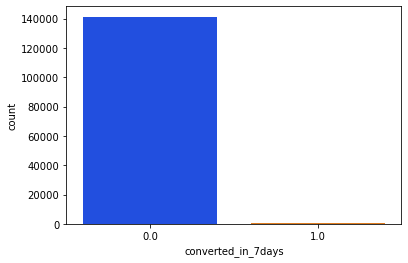

In [18]:
import seaborn as sns
sns.countplot(x=y_test, palette="bright")

In [19]:
# Primero, definimos un conjunto de funciones para calcular las métricas del modelo

# Curva ROC
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Matriz de Confusión: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

In [20]:
## SVM

In [ ]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

svm_estimators = []
svm_estimators.append(('normalize', MinMaxScaler())) # escalamos los datos
svm_estimators.append(('svm', svm.SVC(probability=True))) # definimos SVM con probabilidades 
     
# Definimos el modelo SVM y lo llamamos classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Entrenamos el modelo classifier_SVM sobre los datos de entrenamiento
Classifier_SVM.fit(X_train, y_train)

In [ ]:
## Modelo con Red Neuronal

In [20]:
#librerías y paquetes
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
import numpy as np 
import pandas as pd
import keras_tuner as tk # instalar por cmd
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import to_categorical
from matplotlib import pyplot

In [28]:
# Función para probar hiperparámetros

def model_builder(hp):
    
  hp_activation = hp.Choice('activation', values=['relu', 'tanh','linear','sigmoid'])
  hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=1000, step=50)
  hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=1000, step=50)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
 
  model = Sequential()
  model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation,input_dim=241))
  model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
  model.add(Dense(1, activation='sigmoid',use_bias=False))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),loss='mean_squared_error',metrics=['accuracy'])
    
  ## model.fit(x = X_train, y = y_train)
  
  return model


# Algoritmo Hyperband

tuner = tk.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=100,
                     factor=5,directory='/notebooks/Documents/NOTEBOOKS/RNCLASS-HP6',
                     project_name='RNCLASS-HP6')

# crieterio de parada anticipada
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
# Búsqueda
tuner.search(x=X_train, y=y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[stop_early],verbose=True)
best_model = tuner.get_best_models()[0]
#Resúmen
tuner.search_space_summary()
# Resúmen mejores parámetros
tuner.results_summary()

INFO:tensorflow:Reloading Oracle from existing project /notebooks/Documents/NOTEBOOKS/RNCLASS-HP6\RNCLASS-HP6\oracle.json

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
linear            |?                 |activation
901               |?                 |layer_1
201               |?                 |layer_2
0.0001            |?                 |learning_rate
4                 |?                 |tuner/epochs
0                 |?                 |tuner/initial_epoch
2                 |?                 |tuner/bracket
0                 |?                 |tuner/round

Epoch 1/4


ValueError: in user code:

    File "C:\Users\migue\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\migue\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\migue\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\migue\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\migue\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\migue\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 241), found shape=(None, 286)


In [22]:
# Construcción del MODELO FINAL

"""
activation: linear
layer_1: 701
layer_2: 251
learning_rate: 0.0001
"""
model1 = Sequential()
   
model1.add(tf.keras.layers.Dense(units=701, activation="linear",input_dim=286))
model1.add(tf.keras.layers.Dense(units=251, activation="linear"))
model1.add(Dense(1, activation='sigmoid',use_bias=False))

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='mean_squared_error',metrics=['accuracy'])
model1.fit(X_train,y_train,epochs=20)
print(model1.summary())

#Pronosticamos la respuesta para el dataset de prueba
#En entrenamiento
y_pred_t = model1.predict(X_train)
#En prueba
y_pred = model1.predict(X_test)

class_threshold = 0.5
y_pred_t = np.where(y_pred_t > class_threshold, 1, 0) # clasificación
y_pred = np.where(y_pred > class_threshold, 1, 0) # clasificación


#Accuracy del modelo:  Qué tan frecuentemente el clasificador es correcto?
#En entrenamiento: 
print("Accuracy  NN- entrenamiento: ",metrics.accuracy_score(y_train, y_pred_t))
#En prueba: 
print("Accuracy NN - prueba: ",metrics.accuracy_score(y_test, y_pred))

Epoch 1/20
17732/17732 [==============================] - 33s 2ms/step - loss: 0.0040 - accuracy: 0.9961
Epoch 2/20
17732/17732 [==============================] - 37s 2ms/step - loss: 0.0039 - accuracy: 0.9961
Epoch 3/20
17732/17732 [==============================] - 36s 2ms/step - loss: 0.0039 - accuracy: 0.9961
Epoch 4/20
17732/17732 [==============================] - 35s 2ms/step - loss: 0.0039 - accuracy: 0.9961
Epoch 5/20
17732/17732 [==============================] - 36s 2ms/step - loss: 0.0038 - accuracy: 0.9961
Epoch 6/20
17732/17732 [==============================] - 36s 2ms/step - loss: 0.0038 - accuracy: 0.9961
Epoch 7/20
17732/17732 [==============================] - 36s 2ms/step - loss: 0.0038 - accuracy: 0.9961
Epoch 8/20
17732/17732 [==============================] - 36s 2ms/step - loss: 0.0038 - accuracy: 0.9961
Epoch 9/20
17732/17732 [==============================] - 36s 2ms/step - loss: 0.0038 - accuracy: 0.9961
Epoch 10/20
17732/17732 [==============================

In [ ]:
## Modelos con Random Forest

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn import metrics

In [33]:
# Usando RANDOM FOREST - Modelo 1

from sklearn.ensemble import RandomForestClassifier
RF1 = RandomForestClassifier(n_estimators=30, max_features=200,bootstrap=True, oob_score=False, max_samples=150,random_state=123)
RF1.fit(X_train,y_train)
#Realizando las pruebas
#En entrenamiento
y_pred_t = RF1.predict(X_train)
#En prueba
y_pred = RF1.predict(X_test)

#Accuracy del modelo:  Qué tan frecuentemente el clasificador es correcto?
#En entrenamiento: 
print("Accuracy  RF1- entrenamiento: ",metrics.accuracy_score(y_train, y_pred_t))
#En prueba: 
print("Accuracy RF1 - prueba: ",metrics.accuracy_score(y_test, y_pred))

#-----------------------------------------------------------------------------------------

# Usando RANDOM FOREST - Modelo 2

from sklearn.ensemble import RandomForestClassifier
RF2 = RandomForestClassifier(n_estimators=100, max_features=200,bootstrap=True, oob_score=False, max_samples=150,random_state=123)
RF2.fit(X_train,y_train)
#Realizando las pruebas
#En entrenamiento
y_pred_t = RF2.predict(X_train)
#En prueba
y_pred = RF2.predict(X_test)

#Accuracy del modelo:  Qué tan frecuentemente el clasificador es correcto?
#En entrenamiento: 
print("Accuracy  RF2- entrenamiento: ",metrics.accuracy_score(y_train, y_pred_t))
#En prueba: 
print("Accuracy RF2 - prueba: ",metrics.accuracy_score(y_test, y_pred))

#-----------------------------------------------------------------------------------------

# Usando RANDOM FOREST - Modelo 3

from sklearn.ensemble import RandomForestClassifier
RF3 = RandomForestClassifier(criterion = "gini",min_samples_split=20,min_samples_leaf=10,n_estimators=80, max_features=40,bootstrap=False, oob_score=False,random_state=123)
RF3.fit(X_train,y_train)
#Realizando las pruebas
#En entrenamiento
y_pred_t = RF3.predict(X_train)
#En prueba
y_pred = RF3.predict(X_test)

#Accuracy del modelo:  Qué tan frecuentemente el clasificador es correcto?
#En entrenamiento: 
print("Accuracy  RF3- entrenamiento: ",metrics.accuracy_score(y_train, y_pred_t))
#En prueba: 
print("Accuracy RF3 - prueba: ",metrics.accuracy_score(y_test, y_pred))

Accuracy  RF1- entrenamiento:  0.9961261555001366
Accuracy RF1 - prueba:  0.9961296872025887
Accuracy  RF2- entrenamiento:  0.9961261555001366
Accuracy RF2 - prueba:  0.9961296872025887
Accuracy  RF3- entrenamiento:  0.9961261555001366
Accuracy RF3 - prueba:  0.9961296872025887


In [ ]:
#Boosting

In [27]:
# Modelo ADABOOST1

from sklearn.ensemble import AdaBoostClassifier

ada_model1 = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
ada_model1.fit(X_train, y_train)

ypredtra=ada_model1.predict(X_train)

ypredtes=ada_model1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_train,ypredtra))
print(classification_report(y_train,ypredtra
                           ))
print(confusion_matrix(y_test,ypredtes))

[[565197      0]
 [  2198      0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    565197
         1.0       0.00      0.00      0.00      2198

    accuracy                           1.00    567395
   macro avg       0.50      0.50      0.50    567395
weighted avg       0.99      1.00      0.99    567395

[[141300      0]
 [   549      0]]


In [ ]:
# Modelo ADABOOST2

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

base_model= LogisticRegression()
base_model1= SVC()

ada_model1 = AdaBoostClassifier(base_estimator=base_model1, n_estimators=200, learning_rate=0.1, random_state=0,algorithm='SAMME')
ada_model1.fit(X_train, y_train)

ypredtra=ada_model1.predict(X_train)

ypredtes=ada_model1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_train,ypredtra))
print(classification_report(y_train,ypredtra
                           ))
print(confusion_matrix(y_test,ypredtes))
print(classification_report(y_test,ypredtes))